### 기초 분석
    - 상관계수
    - ANOVA  

In [20]:
import pandas as pd
import numpy as np

import warnings 
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.style.use('seaborn-whitegrid')

import seaborn as sns
plt.style.use('seaborn-whitegrid')
from pylab import rcParams
%matplotlib inline
import itertools

#한글폰트 적용
path = 'C:/Windows/Fonts/gulim.ttc'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [21]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('잠실(보간법).csv',encoding='cp949')
data = data.drop(['Season'],axis=1)
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
data.head()

,수온(℃),DO,BOD,COD,SS,TN,TP,TOC,수소이온농도,전기전도도,암모니아성질소,질산성질소
Date,,,,,,,,,,,,
1994-01-01,2.0,11.9,2.2,2.8,6.0,3.261,0.116,2.0,7.4,192.0,0.470,2.146
1994-02-01,2.0,13.0,2.1,2.6,3.5,3.069,0.100,1.8,8.3,164.0,0.274,2.138
1994-03-01,7.0,11.0,2.2,2.6,6.5,4.502,0.262,1.8,8.0,161.0,0.680,1.419
1994-04-01,16.0,10.3,3.8,4.6,8.0,2.391,0.092,3.2,8.4,271.0,0.628,1.179
1994-05-01,18.0,9.2,3.5,4.2,8.5,3.517,0.082,2.9,7.6,125.0,0.526,1.130


In [22]:
# data.isna().sum() # 결측값 최종 확인 
data.describe() # 데이터 요약통계량 

,수온(℃),DO,BOD,COD,SS,TN,TP,TOC,수소이온농도,전기전도도,암모니아성질소,질산성질소
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,14.270685,10.899256,1.614286,3.865774,7.455060,2.616460,0.052503,2.393452,8.074554,180.430060,0.224118,1.794527
std,8.282655,2.494814,0.809189,0.917522,7.716558,0.885859,0.060693,0.659235,0.547033,54.058776,0.254118,0.490182
min,1.000000,4.900000,0.400000,1.300000,0.600000,1.208000,0.005000,0.900000,6.400000,50.000000,0.000000,0.354000
25%,6.000000,9.100000,1.000000,3.375000,4.400000,2.104000,0.025000,1.900000,7.700000,144.000000,0.036000,1.482250
50%,15.250000,10.600000,1.400000,3.866667,6.100000,2.464500,0.041000,2.300000,8.100000,173.500000,0.125500,1.831000
75%,22.000000,12.625000,2.000000,4.300000,7.800000,2.867250,0.061000,2.800000,8.400000,202.250000,0.337500,2.111500
max,30.900000,17.700000,6.200000,9.400000,105.000000,8.952000,0.824000,5.000000,9.400000,427.000000,1.237000,4.498000


#### SS, 전기전도도 Log 변환

In [23]:
data['전기전도도'] = np.log1p(data['전기전도도'])
data['SS'] = np.log1p(data['SS'])

<AxesSubplot:>

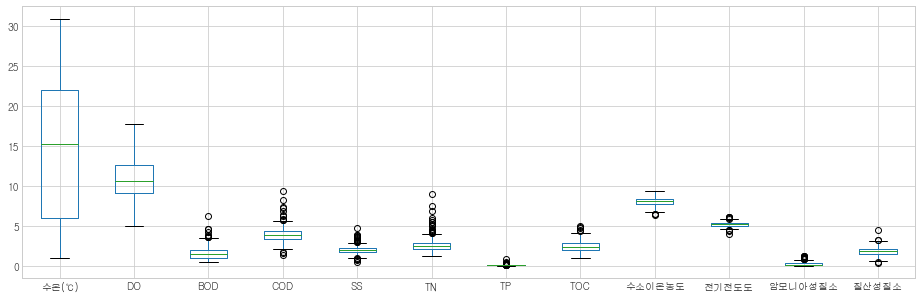

In [40]:
plt.rcParams["figure.figsize"] = (16,5)
data.boxplot()

### 변수 간 상관계수 행렬 

<AxesSubplot:>

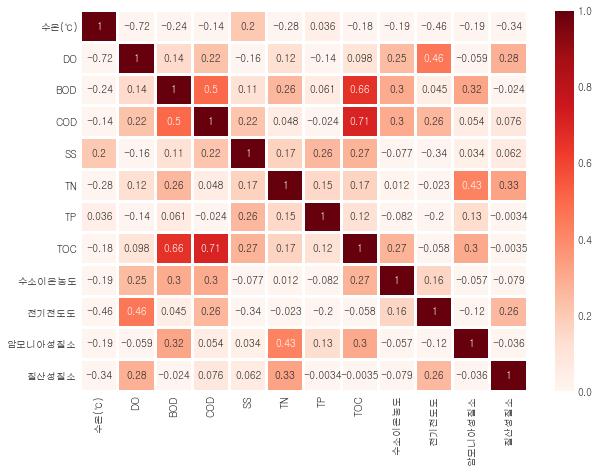

In [24]:
plt.rcParams["figure.figsize"] = (10,7)
sns.heatmap(data.corr(), annot=True, cmap='Reds', linewidths=2, vmin=0)

### 일원배치 분산분석 --> 계절별 오염물질 평균 차이 검정 

In [25]:
anv1 = pd.read_csv('잠실(보간법).csv',encoding='cp949')
anv1 = anv1.drop(['Date'],axis=1)
anv1.head()

,수온(℃),DO,BOD,COD,SS,TN,TP,TOC,수소이온농도,전기전도도,암모니아성질소,질산성질소,Season
0,2.0,11.9,2.2,2.8,6.0,3.261,0.116,2.0,7.4,192.0,0.470,2.146,Winter
1,2.0,13.0,2.1,2.6,3.5,3.069,0.100,1.8,8.3,164.0,0.274,2.138,Winter
2,7.0,11.0,2.2,2.6,6.5,4.502,0.262,1.8,8.0,161.0,0.680,1.419,Spring
3,16.0,10.3,3.8,4.6,8.0,2.391,0.092,3.2,8.4,271.0,0.628,1.179,Spring
4,18.0,9.2,3.5,4.2,8.5,3.517,0.082,2.9,7.6,125.0,0.526,1.130,Spring


In [26]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [27]:
model = ols('DO ~ C(Season)', anv1).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(Season),3.0,891.210796,297.070265,82.612034,6.038089e-40
Residual,332.0,1193.861518,3.595968,NaN,NaN


In [28]:
model = ols('BOD ~ C(Season)', anv1).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(Season),3.0,39.402857,13.134286,24.232085,3.326430e-14
Residual,332.0,179.950794,0.542020,NaN,NaN


In [29]:
model = ols('COD ~ C(Season)', anv1).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(Season),3.0,21.470089,7.156696,9.119311,0.000008
Residual,332.0,260.548532,0.784785,NaN,NaN


In [30]:
model = ols('SS ~ C(Season)', anv1).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(Season),3.0,1732.636280,577.545427,10.52675,0.000001
Residual,332.0,18215.030675,54.864550,NaN,NaN


In [31]:
model = ols('TN ~ C(Season)', anv1).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(Season),3.0,19.164567,6.388189,8.701928,0.000014
Residual,332.0,243.725160,0.734112,NaN,NaN


In [32]:
model = ols('TP ~ C(Season)', anv1).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(Season),3.0,0.019108,0.006369,1.740583,0.158477
Residual,332.0,1.214910,0.003659,NaN,NaN


In [33]:
model = ols('TOC ~ C(Season)', anv1).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(Season),3.0,10.462024,3.487341,8.568292,0.000017
Residual,332.0,135.125794,0.407005,NaN,NaN


In [34]:
model = ols('수소이온농도 ~ C(Season)', anv1).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(Season),3.0,5.338653,1.779551,6.225058,0.000401
Residual,332.0,94.908502,0.285869,NaN,NaN


In [35]:
model = ols('전기전도도 ~ C(Season)', anv1).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(Season),3.0,197183.430804,65727.810268,27.911889,4.035100e-16
Residual,332.0,781804.231151,2354.832022,NaN,NaN


In [36]:
model = ols('암모니아성질소 ~ C(Season)',anv1).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(Season),3.0,0.655103,0.218368,3.455926,0.016751
Residual,332.0,20.977889,0.063186,NaN,NaN


In [37]:
model = ols('질산성질소 ~ C(Season)',anv1).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(Season),3.0,8.874439,2.958146,13.712962,1.876009e-08
Residual,332.0,71.618705,0.215719,NaN,NaN
